In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from pprint import pprint

In [3]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database_hour.csv')
df.set_index('date', inplace=True)

In [4]:
df = df.drop(['% Iron Concentrate'], axis=1)

In [5]:
Y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

Data normalisation using : min_max_scaler .

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

Spliting Data to train and test .

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

K-Cross Validation     (K=3)

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True)
kf.get_n_splits(X_train)
print(kf)
for train_index, test_index in kf.split(X_train):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train3, X_test3 = X_train.iloc[train_index], X_train.iloc[test_index]
     Y_train3, Y_test3 = Y_train.iloc[train_index], Y_train.iloc[test_index]

KFold(n_splits=3, random_state=None, shuffle=True)
TRAIN: [   1    2    3 ... 3272 3274 3276] TEST: [   0    4    9 ... 3271 3273 3275]
TRAIN: [   0    1    2 ... 3273 3275 3276] TEST: [   5   11   14 ... 3269 3272 3274]
TRAIN: [   0    4    5 ... 3273 3274 3275] TEST: [   1    2    3 ... 3264 3268 3276]


linear regression

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=kf)
scores  

array([0.14746547, 0.18451596, 0.14592256])

In [25]:
#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

In [27]:
#specify model
from sklearn.feature_selection import RFE
lr.fit(X_train, Y_train)
rfe = RFE(lr)  

In [30]:
from sklearn.model_selection import GridSearchCV
# call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = kf, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)   

Fitting 3 folds for each of 38 candidates, totalling 114 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:    6.5s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [31]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.073271,0.008882,0.004620,0.000471,2,{'n_features_to_select': 2},0.082294,0.102248,0.071757,0.085433,0.012644,38,0.097624,0.085776,0.102462,0.095287,0.007009
1,0.069120,0.003712,0.005159,0.002014,3,{'n_features_to_select': 3},0.122841,0.128139,0.104549,0.118510,0.010106,37,0.120339,0.116705,0.129310,0.122118,0.005298
2,0.095901,0.026231,0.007135,0.003843,4,{'n_features_to_select': 4},0.138537,0.132228,0.108690,0.126485,0.012844,36,0.136716,0.137868,0.143218,0.139267,0.002833
3,0.092066,0.010320,0.007754,0.001927,5,{'n_features_to_select': 5},0.149230,0.154071,0.115913,0.139738,0.016962,35,0.156090,0.151724,0.151106,0.152973,0.002218
4,0.088190,0.004443,0.005730,0.001781,6,{'n_features_to_select': 6},0.156724,0.158243,0.130190,0.148386,0.012882,34,0.167222,0.164201,0.161618,0.164347,0.002290
5,0.089537,0.009006,0.008486,0.002044,7,{'n_features_to_select': 7},0.153883,0.161252,0.146581,0.153905,0.005990,33,0.170195,0.166978,0.167139,0.168104,0.001480
6,0.077423,0.005711,0.006146,0.000203,8,{'n_features_to_select': 8},0.152874,0.162557,0.158339,0.157923,0.003964,31,0.175214,0.169502,0.172071,0.172262,0.002336
7,0.071701,0.013015,0.006940,0.000509,9,{'n_features_to_select': 9},0.152573,0.162380,0.158027,0.157660,0.004012,32,0.176006,0.170019,0.172644,0.172889,0.002450
8,0.071274,0.012851,0.005912,0.002929,10,{'n_features_to_select': 10},0.156529,0.161022,0.160419,0.159323,0.001991,30,0.176963,0.174870,0.176841,0.176225,0.000959
9,0.090612,0.012494,0.009935,0.003481,11,{'n_features_to_select': 11},0.156745,0.164493,0.159973,0.160404,0.003178,29,0.177169,0.177264,0.177047,0.177160,0.000088


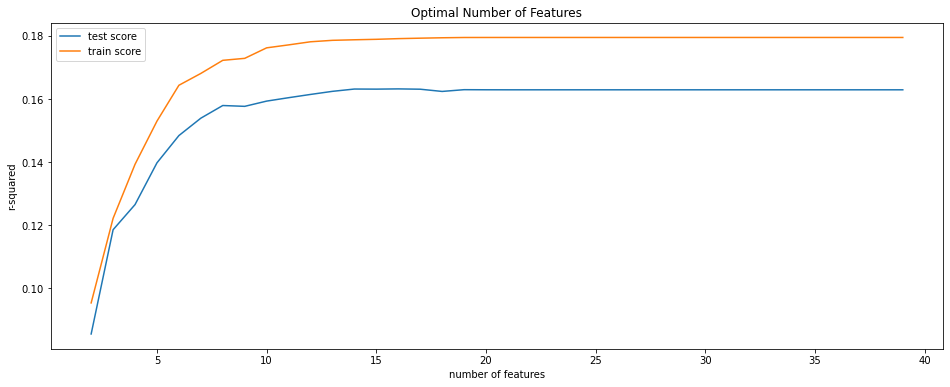

In [32]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

mean squared error

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
error = mean_squared_error(Y_test, predictions)
error

1.1144699672004246

In [38]:
Rsquar = r2_score(Y_test, predictions)
Rsquar

0.13983943993318448

In [17]:
error_train = mean_squared_error(Y_train, predictions_train)
error_train

1.0343425428939734

Decision tree  (using Hyperparameters)

In [33]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)
print('Parameters currently in use:\n')
pprint(DTR.get_params())


Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


In [34]:
DTR.fit(X_train, Y_train)
Y_pred = DTR.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(Y_test,Y_pred)
r_squared = r2_score (Y_test,Y_pred)

Decision tree (using 3 cross validation )

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 200, num = 40)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }
pprint(random_grid)

{'max_depth': [0,
               5,
               10,
               15,
               20,
               25,
               30,
               35,
               41,
               46,
               51,
               56,
               61,
               66,
               71,
               76,
               82,
               87,
               92,
               97,
               102,
               107,
               112,
               117,
               123,
               128,
               133,
               138,
               143,
               148,
               153,
               158,
               164,
               169,
               174,
               179,
               184,
               189,
               194,
               200,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train3, Y_train3)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    5.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.8s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [0, 5, 10, 15, 20, 25, 30,
                                                      35, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 82, 87, 92,
                                                      97, 102, 107, 112, 117,
                                                      123, 128, 133, 138, 143,
                                                      148, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5}

In [38]:
reg2 = DecisionTreeRegressor(min_samples_split=2,min_samples_leaf=4,max_features="sqrt",max_depth=5,random_state=0).fit(X_train, Y_train)
Y_pred2 = reg2.predict(X_test)

In [39]:
mse2 = mean_squared_error(Y_test, Y_pred2)
rmse2 = sqrt(mse2)
mae2 = mean_absolute_error(Y_test,Y_pred2)
r_squared2 = r2_score (Y_test,Y_pred2)

In [40]:
data = {'MSE': [mse, mse2],
        'RMSE': [rmse, rmse2],
        'MAE': [mae, mae2],
        'R²': [r_squared, r_squared2]}
dtrd = pd.DataFrame(data,columns=['MSE', 'RMSE','MAE','R²'],index=['with default hyper parameter', 'with 3-cross valdiation'])

In [41]:
dtrd

,MSE,RMSE,MAE,R²
with default hyper parameter,1.583895,1.258529,0.871806,-0.222468
with 3-cross valdiation,1.122785,1.059616,0.821678,0.133422


Random Forest Regressor 

In [114]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [115]:
Y_pred

array([2.345     , 2.387     , 3.4304784 , 1.861     , 2.0985    ,
       1.93574272, 2.2085    , 1.8035    , 2.95901611, 2.36909863,
       2.12488911, 2.28295564, 2.82492859, 1.901     , 2.136     ,
       4.61812662, 2.385     , 3.49571551, 1.6605    , 2.17375   ,
       2.53467183, 2.19695707, 1.5985    , 2.289     , 2.0915    ,
       1.554     , 3.01052506, 2.4135    , 2.369     , 1.8275    ,
       3.15904863, 2.68606041, 3.14093208, 3.61612184, 2.62675243,
       2.23504492, 2.9259038 , 1.346     , 2.6415    , 2.40279125,
       2.018     , 3.13354465, 1.6675    , 2.077     , 2.33672428,
       4.22701674, 2.83676691, 2.87081227, 1.5095    , 2.05443044,
       2.43088586, 1.6705    , 1.7395    , 2.37350347, 1.482     ,
       1.5755    , 4.01233187, 1.554     , 1.5485    , 2.0575    ,
       4.94653979, 1.418     , 2.78609516, 2.113     , 3.85364041,
       2.01978246, 1.6705    , 1.6335    , 1.9705    , 1.679     ,
       1.86721021, 3.02069967, 2.5375    , 2.29704637, 2.68439

In [116]:
error3 = mean_squared_error(Y_test, Y_pred)
error3

0.9145924936853504

In [117]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.735814532768672
Mean Squared Error: 0.9145924936853504
Root Mean Squared Error: 0.9563432928009431


In [118]:
Rsquar = r2_score(Y_test, Y_pred)
Rsquar

0.29410714083440326

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor()
reg1.fit(X_train, Y_train)
Y_gradient_boosting_pred = reg1.predict(X_test)
Y_gradient_boosting_pred

array([2.6030677 , 2.91480971, 3.27495273, 1.91245521, 2.43404764,
       1.81101499, 2.08973681, 1.90637246, 2.67419943, 2.43359782,
       2.25759894, 1.95667901, 2.79139466, 1.99751107, 2.0441102 ,
       4.11813417, 2.11002161, 2.90923651, 1.5082876 , 2.42491665,
       2.44659532, 2.4023884 , 1.71949399, 2.69690701, 2.2398792 ,
       1.98439901, 2.36141868, 2.2937356 , 2.68214332, 1.65190038,
       2.95240558, 3.25668915, 2.85806121, 2.4750101 , 2.3371302 ,
       2.20714322, 2.62628451, 1.62097949, 2.60448399, 2.54331439,
       2.29844699, 2.50177209, 1.77161725, 2.45747919, 2.10664396,
       4.80783228, 3.0373022 , 2.49473928, 1.69868895, 2.10617705,
       2.67101681, 1.62757156, 1.89152563, 2.69646334, 1.29186912,
       1.61375267, 3.36537916, 1.32531455, 1.52748901, 2.06155429,
       4.79016018, 1.68945479, 2.04959671, 2.26817886, 3.54380325,
       1.92224172, 1.71656575, 1.98588989, 2.50263347, 1.76351903,
       2.0865771 , 2.62894933, 2.44289588, 1.96660115, 2.36667

In [121]:
Rsquar2 = r2_score(Y_test, Y_gradient_boosting_pred)
Rsquar2

0.28917043098225714

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, Y_train)
Y_pred3 = reg.predict(X_test)
Y_pred3

array([2.30402444, 2.97312716, 3.04189372, 1.70620312, 2.1354707 ,
       1.93313913, 1.90101804, 1.7155    , 4.16805069, 2.53409298,
       2.18151814, 2.30171856, 2.74600305, 1.87442727, 1.93314951,
       4.96105   , 2.0361    , 3.56809795, 1.5709572 , 2.1543    ,
       2.20712743, 2.53123084, 1.62024204, 2.5605    , 1.91499183,
       1.82803603, 2.5638    , 2.01541299, 2.56329759, 1.9645572 ,
       2.62655071, 3.19625404, 2.3598241 , 2.80374145, 2.19155   ,
       2.3219554 , 2.72615155, 1.44301903, 3.01885   , 2.38354428,
       2.52470866, 4.0792626 , 1.6403    , 2.50361874, 2.62026541,
       4.78715061, 3.40143835, 3.07648958, 1.4784    , 2.2422478 ,
       2.21596095, 2.1694    , 1.65713336, 2.16221417, 1.3521    ,
       1.4702    , 3.5057054 , 1.6819572 , 1.7172    , 1.89127828,
       5.02267327, 1.4691    , 2.13953391, 2.41761466, 3.57113235,
       2.18545015, 1.7411    , 1.73195   , 1.94046864, 1.4425    ,
       2.04200312, 3.18541821, 2.68191422, 2.1158    , 2.73918

In [132]:
Rsquar3 = r2_score(Y_test, Y_pred3)
Rsquar3

0.428138154292272

In [139]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_xgb_pred = xgb_model.predict(X_test)
Y_xgb_pred

[22:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


array([1.8074054 , 2.0372105 , 2.8703194 , 1.7474418 , 2.11903   ,
       1.898176  , 2.3773587 , 1.8404568 , 4.006625  , 3.2288501 ,
       2.167879  , 1.9807059 , 3.2065053 , 1.4703677 , 2.1127954 ,
       4.4630938 , 2.807105  , 3.184174  , 1.6717225 , 2.5235162 ,
       2.822292  , 2.1689856 , 1.5430977 , 2.3431797 , 2.7626252 ,
       2.1570718 , 2.498592  , 2.3746252 , 2.1378312 , 1.4615886 ,
       3.1701114 , 3.1914718 , 2.7760968 , 2.3849912 , 2.1583285 ,
       2.4461384 , 2.84029   , 1.5611644 , 2.7287347 , 1.8419098 ,
       2.950322  , 3.7614791 , 1.7181052 , 2.1208453 , 2.2843938 ,
       4.6628156 , 3.5422654 , 2.6944718 , 2.102688  , 1.9330357 ,
       2.0026698 , 1.9741555 , 1.7545205 , 2.1953282 , 1.2007606 ,
       1.6858649 , 4.096322  , 1.5284605 , 1.8553308 , 1.9735683 ,
       4.8212323 , 1.4952637 , 1.6792432 , 1.1630311 , 3.794844  ,
       1.6388142 , 1.6088564 , 1.5987711 , 2.8669827 , 1.5831815 ,
       1.8751612 , 2.5494144 , 2.2723503 , 2.703618  , 1.68903

In [140]:
Rsquar3 = r2_score(Y_test, Y_xgb_pred)
Rsquar3

0.3151828362680843

dir lstm w copier coller f dataset lakhor paliz <3

In [ ]:
embed_dim = 128
lstm_out = 200
batch_size = 32
from keras.models import Sequential
import tensorflow
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense
model = Sequential()
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, Y_train, batch_size =batch_size, nb_epoch = 1,  verbose = 5)

In [ ]:
score,acc = model.evaluate(x_test,y_test,verbose=2,batch_size=batch_size)
print("score:%.2f "%(score))
print("Validation Accuracy:%.2f "%(acc))

In [ ]:
data = {'RMSE': ['Belgium', 'India', 'Brazil'],
'R²': ['Brussels', 'New Delhi', 'Brasília']}
df = pd.DataFrame(data,columns=['RMSE', 'R²'])

MultiLayer perceptron 

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from math import sqrt  


n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(21,activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8,activation='relu',  kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

#fit the model 
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

#evaluating the model
error = model.evaluate(X_test, Y_test)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

Epoch 1/100
103/103 [==============================] - 0s 3ms/step - loss: 4.8594
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 1.4804
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 1.3265
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 1.2527
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 1.1670
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 1.1477
Epoch 8/100
103/103 [==============================] - ETA: 0s - loss: 1.134 - 0s 3ms/step - loss: 1.1401
Epoch 9/100
103/103 [==============================] - 0s 3ms/step - loss: 1.1250
Epoch 10/100
103/103 [==============================] - 0s 4ms/step - loss: 1.1134
Epoch 11/100
103/103 [==============================] - 0s 3ms/step - loss: 1.1040
Epoch 12/100
103/103 [==============================] - 0s 3ms/step - lo

In [43]:
#prdecting using the test set 
yhatt = model.predict(X_test)
yhatt

array([[1.885647  ],
       [2.6882758 ],
       [3.2357147 ],
       [2.0027611 ],
       [1.2004082 ],
       [1.9072399 ],
       [1.7111577 ],
       [1.4609259 ],
       [1.9116541 ],
       [2.0410013 ],
       [2.157401  ],
       [2.1434484 ],
       [2.308308  ],
       [1.8090173 ],
       [1.7964625 ],
       [4.0798726 ],
       [2.2848752 ],
       [3.2957823 ],
       [1.9599739 ],
       [2.465344  ],
       [2.0589602 ],
       [2.2867362 ],
       [1.4913226 ],
       [2.24923   ],
       [2.2663128 ],
       [1.1420709 ],
       [2.687688  ],
       [2.0257587 ],
       [2.2398798 ],
       [1.1605757 ],
       [2.3515306 ],
       [2.3475106 ],
       [2.0420408 ],
       [2.0199966 ],
       [2.154678  ],
       [2.3291998 ],
       [2.1465695 ],
       [1.354709  ],
       [2.4986122 ],
       [2.2505774 ],
       [2.1145725 ],
       [2.6126032 ],
       [1.1561507 ],
       [2.2007709 ],
       [2.0105293 ],
       [3.9162054 ],
       [2.1504624 ],
       [2.104

In [44]:
#predicting using a simple row
i = 1299
row = [df['% Iron Feed'].iloc[i],df['% Silica Feed'].iloc[i],df['Starch Flow'].iloc[i],df['Amina Flow'].iloc[i],df['Ore Pulp Flow'].iloc[i],df['Ore Pulp pH'].iloc[i],df['Ore Pulp Density'].iloc[i],df['p-Flotation Column 01 Air Flow'].iloc[i],df['p-Flotation Column 02 Air Flow'].iloc[i],df['p-Flotation Column 03 Air Flow'].iloc[i],df['p-Flotation Column 04 Air Flow'].iloc[i],df['p-Flotation Column 05 Air Flow'].iloc[i],df['p-Flotation Column 06 Air Flow'].iloc[i],df['p-Flotation Column 07 Air Flow'].iloc[i],df['p-Flotation Column 01 Level'].iloc[i],df['p-Flotation Column 02 Level'].iloc[i],df['p-Flotation Column 03 Level'].iloc[i],df['p-Flotation Column 04 Level'].iloc[i],df['p-Flotation Column 05 Level'].iloc[i],df['p-Flotation Column 06 Level'].iloc[i],df['p-Flotation Column 07 Level'].iloc[i]]
row = min_max_scaler.transform([row])
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 1.886
